In [ ]:
#libs <- c("data.table", "tidyverse", "dlpyr", "ggpubr", "glmnet","caret","factoextra","Metrics","
#readr","gplots","ROCR","readxl","e1071","ggplot2","reshape2","gridExtra","ggcorrplot")

#####have to install "SciencesPo" - separately tar.gz #####

#for(i in libs) {

#install.packages(i)
#}


library(base)
library(data.table)
library(tidyverse)
#library(devtools)
#library(car)
library(ggpubr)
library(glmnet)
#library(summarytools)
#library(knitr)
#library(htmltools)
#library(corrplot)
library(caret)
library(factoextra)
library(Metrics)
library(readr)
library(gplots)
library(dplyr)
#library(stringr)
library(ROCR)
library(readxl)
library(e1071)
library(ggplot2)
library(reshape2)
library(gridExtra)
library(ggcorrplot)
library(SciencesPo);

In [25]:

X_data_numeric2 <- read_csv("/Users/laura/FinalDatasetPS14.csv")  #### change this


X_data_numeric <- X_data_numeric2[,-c(dim(X_data_numeric2)[2])]


Names <- names(X_data_numeric)

X_data_numeric  <- data.frame(apply(X_data_numeric, 2, as.numeric))

table(is.na(X_data_numeric))


for(i in 1:ncol(X_data_numeric)){
  X_data_numeric[is.na(X_data_numeric[,i]), i] <- min(data.matrix(X_data_numeric[,i]), na.rm = TRUE)
    #or median
}

NAscol1 <- data.frame(colSums(is.na(X_data_numeric)))


X_data_scaled <-data.frame(scale(X_data_numeric))


All2 <- data.frame(X_data_scaled, as.factor(X_data_numeric2$Label))
names(All2) <- c(Names,"Label")

print("Final normalized and imputed dataset ")
head(All2)

table(is.na(All2))




Parsed with column specification:
cols(
  .default = col_integer(),
  PS14 = col_double(),
  `WBC [109/L]_T1` = col_double(),
  `NEUT [109/L]_T1` = col_double(),
  `LYMPH [109/L]_T1` = col_double(),
  `MONO [109/L]_T1` = col_double(),
  `IG [109/L]_T1` = col_double(),
  `NEUT %_T1` = col_double(),
  `LYMPH %_T1` = col_double(),
  `MONO %_T1` = col_double(),
  `IG %_T1` = col_double(),
  `Increase_CD11b + fMLF (MedFI)_T1` = col_double(),
  `Decrease_CD62L + FMLF (MedFI)_T1` = col_double(),
  `% CD16BRIGHT CD62LDIM_T1` = col_double(),
  `CD16BRIGHT CD62LDIM [106/L]_T1` = col_double(),
  `% CD14+ 16-_T1` = col_double(),
  `% CD14+ 16+_T1` = col_double(),
  `% CD14+ HLA-DRLow/Neg_T1` = col_double(),
  `CD14+ HLA-DRLow/Neg (x106/L)_T1` = col_double(),
  `IL1-Ra_T1` = col_double(),
  `IL-6_T1` = col_double()
  # ... with 58 more columns
)
See spec(...) for full column specifications.



FALSE  TRUE 
10319  1637 

[1] "Final normalized and imputed dataset "


ISS,NISS,PS14,Age,WBC [109/L]_T1,NEUT [109/L]_T1,LYMPH [109/L]_T1,MONO [109/L]_T1,IG [109/L]_T1,NEUT %_T1,⋯,Eff_Mem_Cyto_T3,IL1-Ra_T3,IL-6_T3,IL-8_T3,IL-10_T3,G-CSF_T3,MCP-1_T3,TNF-A_T3,Cortisol (ng/ml)_T3,Label
-1.0464636,-1.3838429,0.6694777,0.02292171,2.1290636,2.8295744,-1.3981345,3.7586484,-0.4697766,1.92180514,⋯,0.4253299,-0.4717103,-0.4277698,-0.503151559,-0.19433802,-0.3404883,-0.4272585,-0.30944049,0.2192912,N
-1.1791752,-0.8027674,0.7725172,-0.96101381,-0.9361674,-0.8048849,-0.4411996,-1.1094699,-0.7030714,-0.34092735,⋯,-0.4511945,-0.1280406,-0.2938123,0.073726841,0.01478357,-0.1414413,-0.4152482,-0.21377984,-0.3116227,Y
-0.8473962,-1.0668926,0.7511861,0.33363819,-0.7715913,-0.7413741,-0.3420354,-0.8498369,-0.2364818,-0.47120589,⋯,-0.9576309,-0.2352173,-0.3715281,-0.005590231,0.43054469,-0.1531610,-0.4272585,-0.01629675,0.2249514,N
-1.5109542,-1.3310178,0.7834649,-0.13243653,-0.3772942,-0.3623578,-0.1189158,-0.4171153,-0.5086591,-0.04608645,⋯,-0.3538029,2.4639616,2.1731424,1.329943099,7.57598291,0.4075845,2.2686327,5.14876658,0.3775903,N
-0.1838382,-0.1688669,0.2418910,1.93900666,0.6324491,0.8894205,-0.4759071,0.5565084,0.6189323,1.08527979,⋯,0.2110684,-0.4717103,-0.4277698,-0.503151559,-0.19433802,-0.3404883,-0.4272585,-0.30944049,1.1099962,Y
-1.1128194,-1.3838429,0.7344444,-0.44315301,-1.0287415,-0.9667352,-0.4213667,-0.6767482,-0.1198345,-0.80718738,⋯,-0.5680645,-0.3879266,-0.3690971,-0.431449718,-0.16970279,-0.3010821,-0.3147455,-0.18519963,-0.2967703,N



FALSE  TRUE 
11956    61 

# Introduce final betas for the three time points here

In [26]:

Betas_select <- data.frame(All2$NISS,All2$'MONO %_T1',All2$'CD63 (MedFI)_T3',All2$'Decrease_CD62L + FMLF (MedFI)_T3')


Betas_select["Label"]<- All2$Label

names(Betas_select) <- c("NISS","First Time Monocytes %","Third Time CD63 (MedFI)","Third Time Decrease in CD62L after FMLF (MedFI)", "Label")

#names(Betas_select) <- c("PS14","First Time Monocytes %","Third Time Decrease in CD62L after FMLF (MedFI)","Third Time HLA-DR (MedFI)", "Label")


Betas_select2 <- Betas_select

head(Betas_select2)

NISS,First Time Monocytes %,Third Time CD63 (MedFI),Third Time Decrease in CD62L after FMLF (MedFI),Label
-1.3838429,1.60389375,0.09697724,0.47460485,N
-0.8027674,-1.02732594,0.29728126,-0.24538442,Y
-1.0668926,-0.58878932,1.60334526,-0.04596122,N
-1.3310178,-0.28181369,0.78322291,-0.88608111,N
-0.1688669,0.02516194,0.07551609,-0.57745420,Y
-1.3838429,0.33213757,0.07500511,1.32737483,N


NISS,First Time Monocytes %,Third Time CD63 (MedFI),Third Time Decrease in CD62L after FMLF (MedFI),Label
-1.3838429,1.60389375,0.09697724,0.47460485,N
-0.8027674,-1.02732594,0.29728126,-0.24538442,Y
-1.0668926,-0.58878932,1.60334526,-0.04596122,N
-1.3310178,-0.28181369,0.78322291,-0.88608111,N
-0.1688669,0.02516194,0.07551609,-0.57745420,Y
-1.3838429,0.33213757,0.07500511,1.32737483,N


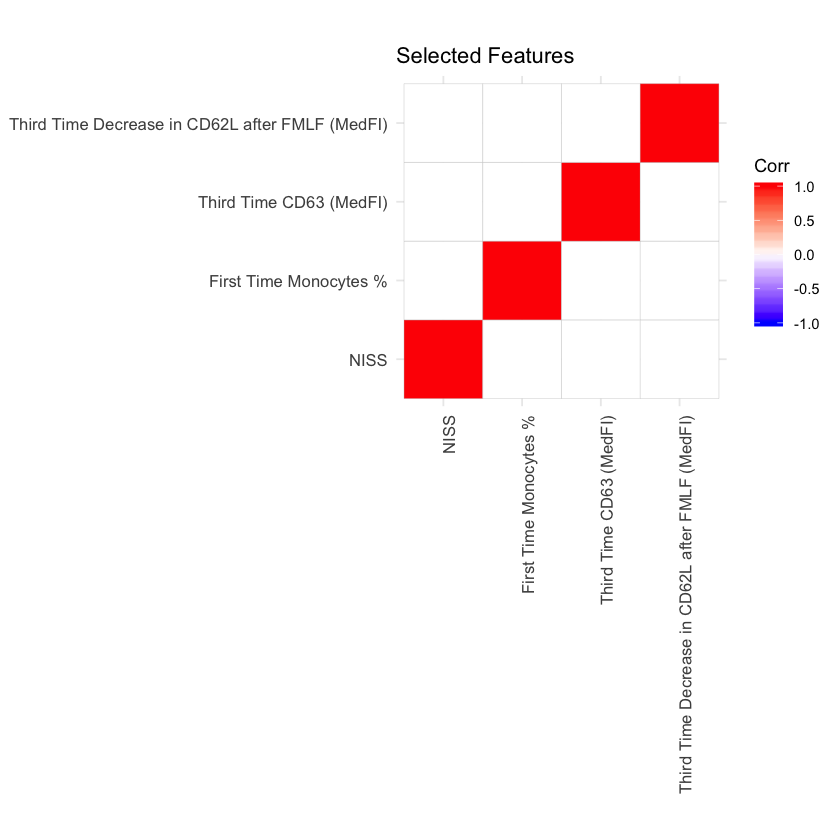

In [27]:
head(Betas_select2)
Subset <- Betas_select2[,-c(length(names(Betas_select2)))]
corr <-cor(Subset)
P_Cor <- cor_pmat(Subset)
print(ggcorrplot(corr,title=paste0("Selected Features"),tl.cex=10,tl.srt = 90,p.mat = P_Cor, sig.level = 0.01, insig = "blank"))




In [28]:

NumVar <- length(Betas_select)
names <-colnames(Betas_select)
names1 <- as.character(names)

names1 <- strsplit(names1,", ")
names <- as.data.frame(names1)

N <- 1000

multipleAUC<-matrix(rnorm(2),1,N) 
  multipleAUCR<-matrix(rnorm(2),1,N) 
  multipleAUCNB<-matrix(rnorm(2),1,N) 
  multipleAUCNBR<-matrix(rnorm(2),1,N) 
  
  multipleROC<-matrix(as.list(rnorm(2)),1,N)  
  multipleROCR<-matrix(as.list(rnorm(2)),1,N)  
  multipleNBROC<-matrix(as.list(rnorm(2)),1,N) 
  multipleNBROCR<-matrix(as.list(rnorm(2)),1,N) 
  
  singleROC<-list()
  doubleROC<-list()
  singleROCR<-list()
  doubleROCR<-list()
  
  doublePlus<-list()
  singlePlus<-list()
  
  singleAUC<-matrix(rnorm(2),NumVar-1,N)    
  doubleAUC<-matrix(rnorm(2),(NumVar-1),N) 
  singleAUCR<-matrix(rnorm(2),NumVar-1,N)    
  doubleAUCR<-matrix(rnorm(2),(NumVar-1),N)
  
  doubleAUCSVMR<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCSVM<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCSVMCrossR<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCSVMCross<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCRFCross<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCRFCrossR<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCNBR<-matrix(rnorm(2),(NumVar-1),N) 
  doubleAUCNB<-matrix(rnorm(2),(NumVar-1),N) 
  
  MatsingleROC<-matrix(as.list(rnorm(2)),NumVar-1,N)  
  MatsingleROCR<-matrix(as.list(rnorm(2)),NumVar-1,N)  
  MatdoubleROC<-matrix(as.list(rnorm(2)),(NumVar-1),N) 
  MatdoubleROCR<-matrix(as.list(rnorm(2)),(NumVar-1),N) 
  
  MatsinglePlus<-matrix(as.list(rnorm(2)),NumVar-1,N) 
  MatdoublePlus<-matrix(as.list(rnorm(2)),(NumVar-1),N)
  MatsinglePlusR<-matrix(as.list(rnorm(2)),NumVar-1,N) 
  MatdoublePlusR<-matrix(as.list(rnorm(2)),(NumVar-1),N)
  multiplePlus<-matrix(as.list(rnorm(2)),1,N)
  multiplePlusR<-matrix(as.list(rnorm(2)),1,N)

set.seed(132)

source("/Users/laura/Documents/PhD/R/PipelineAll/FunctionsAUC.R")

print("loaded")

[1] "loaded"


In [ ]:


for (j in 1:N){ #N different measurements of AUC values, mean done at the end. 
  
  smp_size <- floor(0.65 * nrow(Betas_select2))
  #set.seed(907)
  train_ind <- sample(seq_len(nrow(Betas_select2)), size = smp_size)
  
  # Training set
  train <- Betas_select2[train_ind, ]
  
  # Test set
  test <- Betas_select2[-train_ind, ]
  
  xtrain <- model.matrix(Label~. -1, data = train)
  
  ytrain <- train$Label
  xtest <- model.matrix(Label~. -1, data = test)
  ytest <- test$Label
  
  xtest <- data.frame(xtest)
  xtrain <- data.frame(xtrain)
  names(xtrain) <- names(train)[1:dim(train)[2]-1]
  names(xtest) <- names(test)[1:dim(train)[2]-1]
  
  multipleAUCNB[1,j] <- multipleAUCfunNB(xtrain, ytrain,xtest,ytest)
  multipleAUC[1,j] <- multipleAUCfun(xtrain, ytrain,xtest,ytest)
  
  multipleNBROC[[j]] <- multipleROCfunNB(xtrain, ytrain,xtest,ytest)
  
  multipleROC[[j]] <- multipleROCfun(xtrain, ytrain,xtest,ytest)
  multiplePlus[1,j] <- multiplePlusfun(xtrain, ytrain,xtest,ytest)
  
  #separate
  
  for (s in (1:(NumVar-1))){
    s <- as.numeric(s)
    singleAUC[s,j] <- singleAUCfun(xtrain, ytrain,xtest,ytest,s) 
    singleROC[[s]] <- singleROCfun(xtrain, ytrain,xtest,ytest,s) 
    MatsinglePlus[s,j] <- singlePlusfun(xtrain, ytrain,xtest,ytest,s) 
  }
  MatsingleROC[,j] <- matrix(singleROC)
  
  
  #Null Hypothesis #### 
  
  
  # Training set
  
  train$Label <- sample(train$Label)
  test$Label <- sample(test$Label)
  #Permuted data, will make sure that are models are really valid as randomizing the label should yield around 0.5 AUC values. The same testing and training arrangements for the real per model are used. 
  
  # Test set
  
  
  xtrain <- model.matrix(Label~. -1, data = train)
  
  ytrain <- train$Label
  xtest <- model.matrix(Label~. -1, data = test)
  ytest <- test$Label
  
  xtest <- data.frame(xtest)
  xtrain <- data.frame(xtrain)
  names(xtrain) <- names(train)[1:dim(train)[2]-1]
  names(xtest) <- names(test)[1:dim(train)[2]-1]

  
  multipleAUCNBR[1,j] <- multipleAUCfunNB(xtrain, ytrain,xtest,ytest)
  multipleAUCR[1,j] <- multipleAUCfun(xtrain, ytrain,xtest,ytest)
  multiplePlusR[1,j] <- multiplePlusfun(xtrain, ytrain,xtest,ytest)
  
  multipleNBROCR[[j]] <- multipleROCfunNB(xtrain, ytrain,xtest,ytest)
  multipleROCR[[j]] <- multipleROCfun(xtrain, ytrain,xtest,ytest)
  
  
  for (s in (1:(NumVar-1))){
    s <- as.numeric(s)
    singleAUCR[s,j] <- singleAUCfun(xtrain, ytrain,xtest,ytest,s) 
    singleROCR[[s]] <- singleROCfun(xtrain, ytrain,xtest,ytest,s) 
    MatsinglePlusR[s,j] <- singlePlusfun(xtrain, ytrain,xtest,ytest,s) 
  }
  MatsingleROCR[,j] <- matrix(singleROCR)
  
    print(j)
}

print("done");




In [20]:
#Inside the folder of interest - write WD here - a new folder called FigAUC will be created 

WD <- paste(path.expand("~"), "/Documents/PhD/R/PipelineAll/", sep="") ### change this 
setwd(WD)

dir.create(file.path(WD, "FigAUC"), showWarnings = FALSE)

trial <- NULL
test_name <- "Laura"

singleAUC <- as.data.frame(singleAUC)
singleAUC <- mutate(singleAUC, Means=rowMeans(singleAUC))
row.names(singleAUC) <- names(xtrain)

singleAUCR <- as.data.frame(singleAUCR)
singleAUCR <- mutate(singleAUCR, Means=rowMeans(singleAUCR))
row.names(singleAUCR) <- names(xtrain)

multipleAUCR <- as.data.frame(multipleAUCR)
multipleAUCR["Means"] <- rowMeans(as.data.frame(multipleAUCR))

multipleAUC <- as.data.frame(multipleAUC)
multipleAUC["Means"] <- rowMeans(as.data.frame(multipleAUC))

Final <- data.frame(Multi=t(multipleAUC),MultiRand=t(multipleAUCR) )
FinalMeans <- data.frame(Multi=multipleAUC$Means,MultiRand=multipleAUCR$Means )

MonoSingle <- plotAUCSingle(singleAUC, singleAUCR,NumVar,test_name)

names <-names(Betas_select2)
names1 <-as.character(names)
names1 <-strsplit(names1,", ")
names1 <-as.data.frame(names1)

MonoMultiple <- plotAUCMultiple(multipleAUC, multipleAUCR,2,test_name)

Total <- data.frame(Single=singleAUC$Means,SingleRandom=singleAUCR$Means)
m <-length(names)
rownames(Total) <- colnames(Betas_select)[1:(length(names)-1)]

summary(MonoMultiple)
head(singleAUC)
Final


      Mono                  Label     
 Min.   :0.1238   Model        :1000  
 1st Qu.:0.4952   Permuted data:1000  
 Median :0.7500                       
 Mean   :0.7049                       
 3rd Qu.:0.9286                       
 Max.   :1.0000                       

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V992,V993,V994,V995,V996,V997,V998,V999,V1000,Means
NISS,0.7024793,0.7416667,0.6285714,0.7948718,0.7476190,0.8761905,0.7410714,0.7767857,0.7142857,0.7750000,⋯,0.8809524,0.9017094,0.6666667,0.6111111,0.7905983,0.6446281,0.8041667,0.6718750,0.6958333,0.7249053
First Time Monocytes %,0.6404959,0.7375000,0.7238095,0.5299145,0.8238095,0.5761905,0.8437500,0.5044643,0.8142857,0.6666667,⋯,0.8190476,0.6068376,0.7428571,0.5940171,0.6923077,0.6652893,0.7291667,0.7552083,0.8208333,0.7204401
Third Time CD63 (MedFI),0.6776860,0.5333333,0.5428571,0.6923077,0.8380952,0.7714286,0.9017857,0.7678571,0.6857143,0.8500000,⋯,0.7809524,0.6837607,0.6666667,0.6410256,0.8803419,0.8347107,0.6500000,0.6145833,0.5166667,0.7057429
Third Time Decrease in CD62L after FMLF (MedFI),0.6363636,0.7375000,0.7142857,0.7692308,0.7523810,0.6619048,0.8482143,0.8080357,0.6380952,0.7708333,⋯,0.7000000,0.8205128,0.8952381,0.7692308,0.6923077,0.7148760,0.7250000,0.8541667,0.6791667,0.7321814


,Multi,MultiRand
V1,0.6818182,0.5785124
V2,0.8333333,0.4000000
V3,0.8190476,0.3619048
V4,0.9316239,0.5641026
V5,0.9619048,0.3238095
V6,0.8666667,0.5142857
V7,0.9821429,0.1428571
V8,0.9732143,0.5267857
V9,0.8571429,0.2285714
V10,0.9416667,0.4416667


                                                     Real Permuted_Data
NISS                                            0.7249053     0.4971497
First Time Monocytes %                          0.7204401     0.4935576
Third Time CD63 (MedFI)                         0.7057429     0.5025363
Third Time Decrease in CD62L after FMLF (MedFI) 0.7321814     0.4921927
Multivariate                                    0.9177659     0.4921130
                                                                                          Names
NISS                                                                                       NISS
First Time Monocytes %                                                   First Time Monocytes %
Third Time CD63 (MedFI)                                                 Third Time CD63 (MedFI)
Third Time Decrease in CD62L after FMLF (MedFI) Third Time Decrease in CD62L after FMLF (MedFI)
Multivariate                                                                       Multi

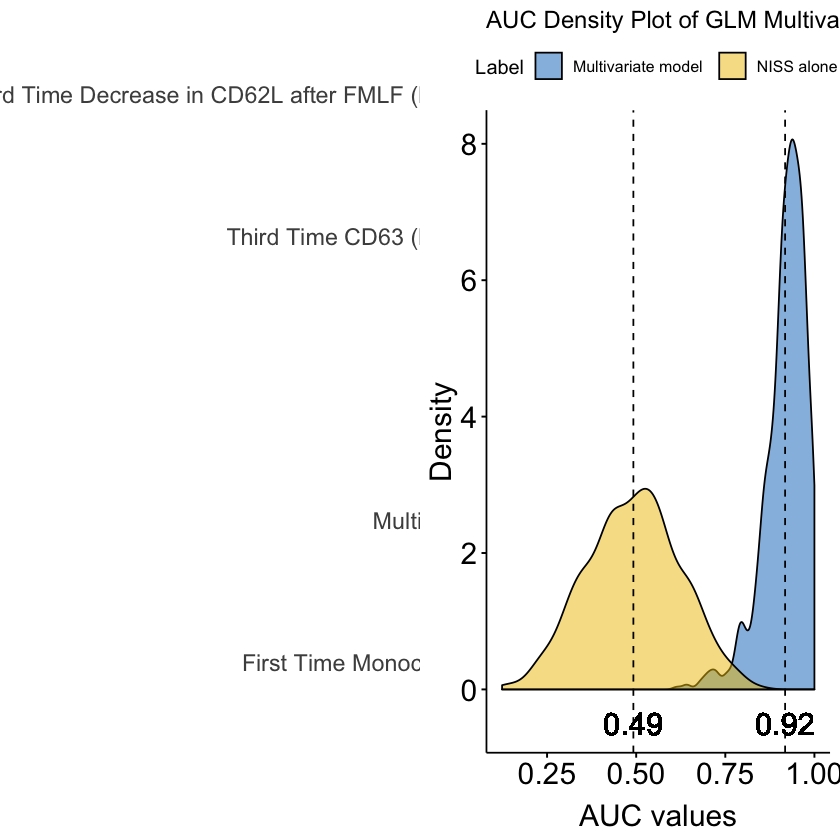

In [21]:
#Plots

MeansMultiple <- FinalMeans
MeansSingle <- Total[,c(1,2)]


colnames(MeansSingle) <- c("Real", "Permuted_Data")
Total <- rbind(MeansSingle, Multivariate=data.frame(Real=MeansMultiple$Multi,Permuted_Data=MeansMultiple$MultiRand))
Total["Names"]<- rownames(Total)

print(Total)

plot1 <- ggplot(Total, aes(y=Names, x=Permuted_Data,xend=Real))+geom_dumbbell(color="cornflowerblue", size=1.5, point.colour.l="goldenrod1")+theme(axis.text.x = element_text(angle = 90), axis.text=element_text(size=14),axis.title=element_text(size=18),strip.text.x = element_text(size = 8, colour = "black"),axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)),axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)))+labs(x="AUC values",y="Selected Features")+xlim(0.4,1)
saveRDS(plot1, paste("Results/",test_name, "_Finalplot.rds"))


#multipleAUCR <- singleAUC[4,]
#row.names(multipleAUCR) <- NULL

val <- 2

Meanq <- data.frame(multipleAUC$Means,multipleAUCR$Means)
  MA <- data.frame(Mono=t(multipleAUC[1:dim(multipleAUC)[2]-1]))
 
  MAR<-data.frame(Mono=t(multipleAUCR[1:dim(multipleAUCR)[2]-1]))
 
  MA["Label"]<-as.factor(c(rep("Multivariate model",dim(MA)[1])))
  MAR["Label"]<-as.factor(c(rep("NISS alone",dim(MAR)[1])))
  
  Mono<-rbind(MA,MAR)
  
pp <-ggdensity(Mono, x = "Mono", fill = "Label", palette = "jco")+geom_vline(xintercept=Meanq[1,1],linetype = 2,color="black",show.legend = TRUE)+
    labs(title= paste("AUC Density Plot of GLM Multivariate Model"),y="Density",x="AUC values")+
    geom_text(aes(x=as.numeric(Meanq[1,1]),y=-0.5,label=signif(Meanq[1,1], digits = 2)),size=6.5)+
    geom_text(aes(x=as.numeric(Meanq[1,2]),y=-0.5,label=signif(Meanq[1,2], digits = 2)),size=6.5)
  
plot2 <- pp+geom_vline(xintercept=Meanq[1,2],linetype = 2,color="black",show.legend = TRUE)+theme(axis.text=element_text(size=18),axis.title=element_text(size=18),strip.text.x = element_text(size = 18, colour = "black"),
  axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)))+labs(x="AUC values",y="Density")

#pdf("/Users/laura/Desktop/FinalPaper/FinalPlot07NAs1NISS.pdf",width=15, height=5)

save5 <- grid.arrange(arrangeGrob(plot1,plot2, ncol=2), ncol=1)

#graphics.off()



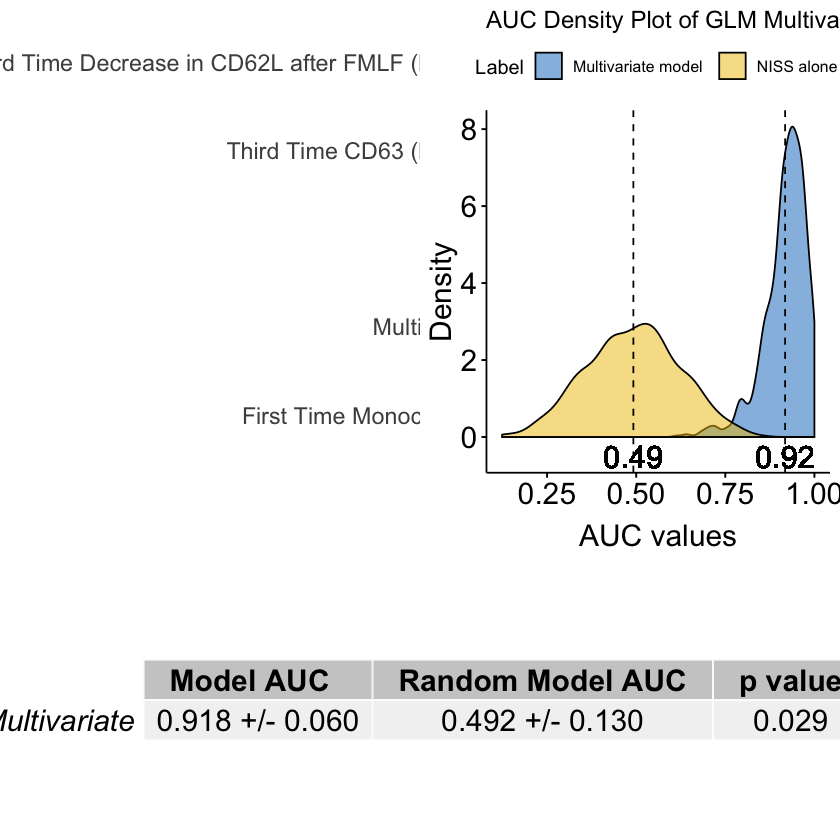

In [22]:
dd<- data.frame(Random=as.numeric(multipleAUCR[1,]),Normal=as.numeric(multipleAUC[1,]))
ddsd <- format(round(sd(dd$Random), 3), nsmall = 3)
ddsd2 <- format(round(sd(dd$Normal), 3), nsmall = 3)

count2 <- 0
count <- list()
gg <- 0 
ss <- 0


for (i in 1:(length(as.numeric(multipleAUCR[1,]))-1)){
  ss <- ss+1 
  for (j in 1:(length(as.numeric(multipleAUCR[1,]))-1)){
    gg <- gg+1
    if (dd$Random[i] > dd$Normal[j]){
      count2 <- count2 + 1
      
    }
  }
  count[i] <- count2
  count2 <- 0
}

s <- data.frame(table(as.numeric(count)))
pval <- length(s$Var1)/length(as.numeric(singleAUC[4,]))
pval <- format(round(pval, 3), nsmall = 3)

MeansMultiple$Multi <- format(round(as.numeric(MeansMultiple$Multi), 3), nsmall = 3)
MeansMultiple$MultiRand <- format(round(as.numeric(MeansMultiple$MultiRand), 3), nsmall = 3)



FinalVal <- paste(MeansMultiple$Multi,"+/-",ddsd2)
FinalValRand <- paste(MeansMultiple$MultiRand,"+/-",ddsd)
FinalTable<- data.frame(FinalVal,FinalValRand,pval)
rownames(FinalTable) <- c("Multivariate")
names(FinalTable) <- c("  Model AUC    ","  Random Model AUC  ","  p value  ")


mytheme <- gridExtra::ttheme_default(
  core = list(fg_params=list(cex = 1.5)),
  colhead = list(fg_params=list(cex = 1.5)),
  rowhead = list(fg_params=list(cex = 1.5)))

tbl <- tableGrob(FinalTable, theme=mytheme)

#pdf("/Users/laura/Desktop/FinalPaper/FinalPlot07NAs2NISS.pdf",width=13, height=6)

grid.arrange(save5, tbl,
             nrow=2,
             as.table=TRUE,
             heights=c(2,1))

#graphics.off()

# Introduce the data set time point here to analyze individually

NISS,First Time Monocytes %,Third Time CD63 (MedFI),Third Time Decrease in CD62L after FMLF (MedFI),Label
-1.3838429,1.60389375,0.09697724,0.47460485,N
-0.8027674,-1.02732594,0.29728126,-0.24538442,Y
-1.0668926,-0.58878932,1.60334526,-0.04596122,N
-1.3310178,-0.28181369,0.78322291,-0.88608111,N
-0.1688669,0.02516194,0.07551609,-0.57745420,Y
-1.3838429,0.33213757,0.07500511,1.32737483,N


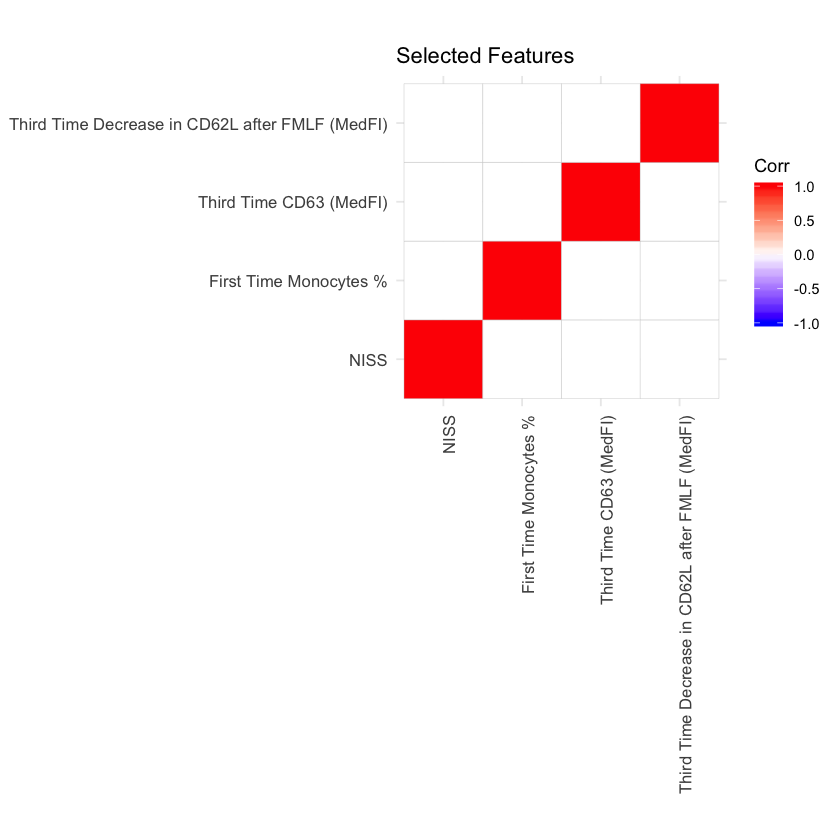

In [23]:
head(Betas_select2)
Subset <- Betas_select2[,-c(length(names(Betas_select2)))]
corr <-cor(Subset)
P_Cor <- cor_pmat(Subset)
print(ggcorrplot(corr,title=paste0("Selected Features"),tl.cex=10,tl.srt = 90,p.mat = P_Cor, sig.level = 0.01, insig = "blank"))

